# Análisis de frecuencia

En esta práctica trabajaremos con el análisis de señales desde el dominio de la frecuencia. Corresponde al tema 3 de la teoría

## Señales continuas

### Series de Fourier

La mayor parte de las señales pueden descomponerse en una suma de componentes sinusoidales. Para señales períodicas en tiempo continuo esta descomposición se denomina **Serie de Fourier**.
Ejemplos de señales períodicas interesantes que podemos descomponer a través de la serie de Fourier son las señales cuadradas, rectangulares, triangulares, sinusoides y exponenciales complejas.

La representación en series de Fourier la podemos encontrar en *diferentes formas* pero al final son equivalentes. Típìcamente la podemos encontrar como una suma lineal ponderada de exponenciales complejas relacionadas armónicamente  pero también es habitual verla como una combinación lineal de senos y cosenos.




A nivel práctico, el análisis en frecuencia para señales en el dominio del tiempo  se realiza empleando un procesador digital de señales, que puede ser una computadora digital de propósito general o sobre un hardware especialmente diseñado. Esto tiene gran importancia porque requiere de una representación apropiada tanto para la entrada de datos  como para la salida, es decir, tratar con secuencias continuas (a la entrada o a la salida) no es lo más adecuado computacionalmente.

En el caso de las Series de Fourier nos encontramos que tenemos que procesar señales períodicas y continuas en el tiempo, una aproximación apropiada para este problema es trabajar con [Sympy](https://www.sympy.org/) que es una librería de matemática simbólica de Python.


### Series de Fourier - Sympy

Sympy proporciona una función para calcular las series de Fourier a través de la serie trigonométrica. 

Recordamos que la representación en forma de serie de senos y cosenos es: 


$\large x_p(t)= \frac{a_0}{2}+\sum\limits_{n=1}^{\infty}[a_n cos(2\pi n \frac{1}{T} t))+b_n sen(2\pi n \frac{1}{T} t)]$



Para el cáculo de los coeficientes:

$\large a_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) cos(2\pi n\frac{1}{T}t)~dt$



$\large b_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) sen(2\pi n\frac{1}{T}t)~dt$


<b>Nota</b>: Se integra en un período  de $x_p(t)$ como, por ejemplo, $0-T_{x}$.



Desde Sympy usaremos la función [fourier_series](https://docs.sympy.org/latest/modules/series/fourier.html#sympy.series.fourier.fourier_series).
La estructura básica es:
```python
from sympy import fourier_series
fourier_series(f, limits)
```

donde:

* **f**: representa la señal continua períodica. Nuestro $x_p(t)$ en las ecuaciones previas
* **limits**: representa una tripla (sym, start, end).
    * sym es el la variable (*símbolo*) respecto a la que desarrollamos la serie de Fourier. En nuestro caso representaría el tiempo y es la *t* en las ecuaciones previas
    * start y end son los límites de los intervalos del período sobre el que calculamos la serie




#### Ejemplo básico de uso

Calcular la serie de fourier sobre una señal "diente de sierra" [sawtooth_wave](https://en.wikipedia.org/wiki/Sawtooth_wave),  con período $2\pi$ $(-\pi, \pi)$

Para *atacar* estos problemas con Sympy tenemos primero que implementar la función que representaría el comportamiento de la señal en el período en el que la vamos a analizar (ej. $(-\pi, \pi)$). Esta señal tiene un comportamiento en forma de rampa durante el período y luego cae a cero de forma recta y vuelve a empezar. **Solo nos tenemos que preocupar de su comportamiento dentro de ese período**, es decir, del comportamiento de rampa. 


In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp
from sympy.abc import t #IMPORTANTE. Es necesario definir la variable simbólica
#Otras formas de crear símbolos
#x=sp.Symbol('x')
#x,y=sp.symbols("x y")
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

sp.init_printing()#Selecciona el mejor modo de impresión para sympy de los disponibles

#definimos la función con un comportamiento de rampa 
#Será la que usemos dentro del período
def f(t):
    return t

Establecemos los límites y creamos la representación de la serie a través de la función *fourier_series*

In [2]:
#Aquí establecemos los límites que se usarán y la variable simbólica que usaremos
#La variable coincide con la que usamos en la función
limits=(t, -sp.pi, sp.pi)
s = sp.fourier_series(f(t), limits)

#es una función tan sencilla que podríamos hacer todo en la misma línea, 
#ya que la función solo devuelve el propio valor
#s = fourier_series(t, (t, -pi, pi))



Una vez tenemos la representación podemos calcular los armónicos (ojo con esta parte porque es computacionalmente intensiva)

In [3]:
#obtenemos "n" armónicos
s1 = s.truncate(n=3) # 3 armónicos
display(s1) #display, en lugar de print, nos permite un output más "bonito". Requiere un from IPython.display import display
print(s1)
s2 = s.truncate(n = 5)# 5 armónicos
display(s2)
s3 = s.truncate(n = 30)# 10 armónicos
display(s3)


2*sin(t) - sin(2*t) + 2*sin(3*t)/3


Ahora podemos [plotear](https://docs.sympy.org/latest/modules/plotting.html#plotting-function-reference) los resultados para ver si conseguimos aproximar la secuencia en el dominio del tiempo con nuestra serie de Fourier.





<b>Nota</b>: La señal original se genera con la función que creamos en la que solo nos preocupamos de su comportamiento en el período, por lo que no se va a visualizar de forma periódica

###Start Info plot object###
Plot object containing:
[0]: cartesian line: t for t over (-10.0, 10.0)
[1]: cartesian line: 2*sin(t) - sin(2*t) + 2*sin(3*t)/3 for t over (-10.0, 10.0)
[2]: cartesian line: 2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5 for t over (-10.0, 10.0)
[3]: cartesian line: 2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5 - sin(6*t)/3 + 2*sin(7*t)/7 - sin(8*t)/4 + 2*sin(9*t)/9 - sin(10*t)/5 + 2*sin(11*t)/11 - sin(12*t)/6 + 2*sin(13*t)/13 - sin(14*t)/7 + 2*sin(15*t)/15 - sin(16*t)/8 + 2*sin(17*t)/17 - sin(18*t)/9 + 2*sin(19*t)/19 - sin(20*t)/10 + 2*sin(21*t)/21 - sin(22*t)/11 + 2*sin(23*t)/23 - sin(24*t)/12 + 2*sin(25*t)/25 - sin(26*t)/13 + 2*sin(27*t)/27 - sin(28*t)/14 + 2*sin(29*t)/29 - sin(30*t)/15 for t over (-10.0, 10.0)
###End Info plot object###


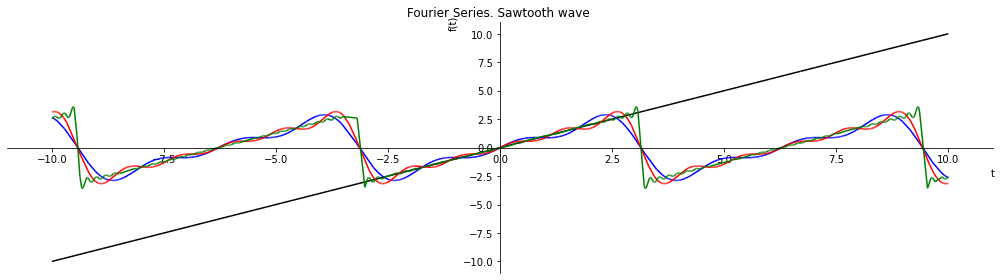

In [4]:
p=sp.plot(f(t),s1,s2,s3,(t,-10, 10), show=False, legend=False, title="Fourier Series. Sawtooth wave ")
#p=sp.plot(f(t),s1,s2,s3,(t,sp.pi, -sp.pi), show=False, legend=False) #Si solo quiero visualizar un período
print("###Start Info plot object###")
print(p)
print("###End Info plot object###")
p[0].line_color="black"
p[1].line_color="blue"
p[2].line_color="red"
p[3].line_color="green"
p.show()

Una vez creada la serie de fourier se pueden obtener sus coeficientes ($a_n$ y $b_n$)

Se puede acceder en forma de lista de la siguiente forma:
```python
s.a0
s.an
s.bn
```


$\large x_p(t)= \color{blue}{\frac{a_0}{2}}+\sum\limits_{n=1}^{\infty}[\color{blue}{a_n} cos(2\pi n \frac{1}{T} t))+\color{blue}{b_n} sen(2\pi n \frac{1}{T} t)]$


En nuestro caso, al ser una función impar, los $a_n$ (coeficientes del coseno) se anulan  y dan cero (lo podeis comprobar a mano)

Para obtener un coeficiente en concreto:

<code>s.bn.coeff(5)</code>

Para obtener el valor real necesitamos darle un valor a $t$ que convierta el seno/coseno en 1 (dependiendo si el coeficiente es $a_n$ o $b_n$) substituyendo con la función apropiada (*subs*) de Sympy. 

Ejemplo: para obtener el coeficiente $b_5$ necesitamos

<code> s.bn.coeff(5).subs(t, sp.pi/2 * 5)</code>

In [5]:
display(s.a0)
display(s.an)
display(s.bn)

display(s.bn.coeff(5))
display(s.bn.coeff(5).subs(t, sp.pi/2 * 5))


Obviamente esto lo podríamos hacer también a base de las fórmulas dadas para los coeficientes.

### Ejercicio
Para practicar con Sympy <b>implementar las funciones para calcular $a_n$ y $b_n$ </b> partiendo de las siguiente cabeceras:

```python
def an(n,f, limits):
    #resto del código
```
   

```python
def bn(n,f, limits):
    #resto del código
```

```python
#Ejemplo para llamar a las funciones creadas
limits=(t, -sp.pi, sp.pi)
display(bn(5, f(t), limits))

```

$\large a_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) cos(2\pi n\frac{1}{T}t)~dt$



$\large b_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) sen(2\pi n\frac{1}{T}t)~dt$


Para realizar una [integral](https://docs.sympy.org/latest/tutorial/calculus.html#integrals) en Sympy 

In [6]:
#Implementación ejercicio
t = sp.symbols("t")

def funcion_dientes_sierra(t):
    return t

def coef_bn_dientes_sierra(n, f, limits):
    # integracion
    T = limits[2] - limits[1]
    salida = 2/T * sp.integrate(f*sp.sin(2*sp.pi*n*t/T), limits)
    return salida

# Prueba
display(s.bn.coeff(4))
display(s.bn.coeff(4).subs(t, sp.pi/8.0))
display(coef_bn_dientes_sierra(4, funcion_dientes_sierra(t), (t, -sp.pi, sp.pi)))

### Ejercicio

Desarrollar la serie de fourier para una sinusoide rectificada de la forma:

![Secuencia cuadrada](secuencia_rectificada.png)


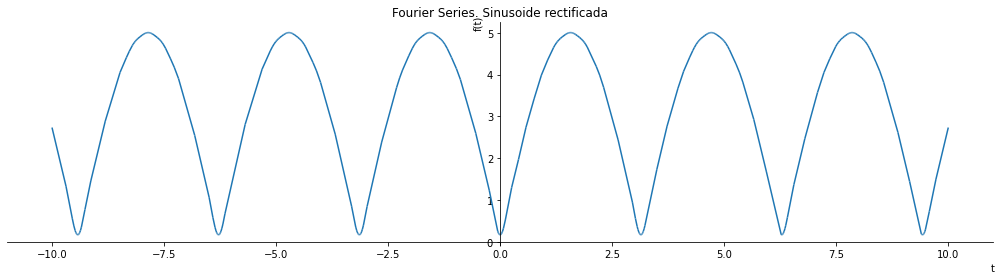

In [7]:
#Implementación ejercicio
t = sp.symbols("t")
limits = (t, 0, sp.pi)
s = sp.fourier_series(sp.sin(t)*5, limits)
display(s.truncate(10))
p = sp.plot(s.truncate(10),(t,-10, 10), show=False, legend=False, title="Fourier Series. Sinusoide rectificada")
p.show()

### Ejercicio

Desarrollar la serie de fourier para una señal cuadrada de la forma:

![Secuencia cuadrada](secuencia_cuadrada.png)


**Notas importantes**
* Para emplear el símbolo $\pi$ debéis de usar la variable pi de Sympy (**no vale la de Numpy**)
* Para condicionales en las funciones que van a tratar con variables simbólicas debéis de usar y devolver un objeto  [Piecewise](https://docs.sympy.org/latest/modules/functions/elementary.html#piecewise)
    * Los operadores lógicos (AND, OR) tienen su equivalente en Sympy (ej. sp.And(exp1,expr2))
    
* Las operaciones matemáticas tipo *abs* tienen su equivalente en Sympy (ej. sp.Abs())


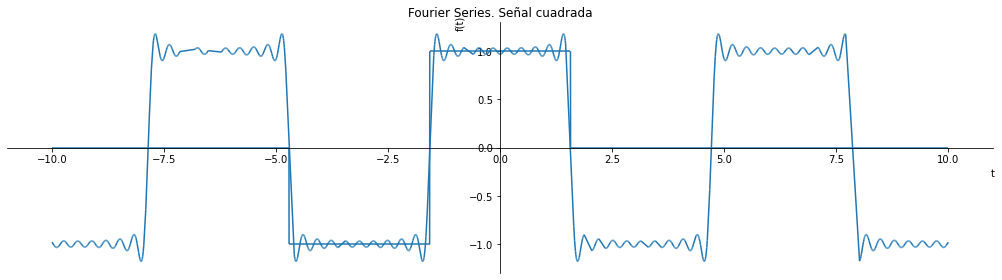

In [8]:
#Implementación ejercicio
t = sp.symbols("t")

def funcion_cuadrada(t):
    return sp.Piecewise((-1, (t>=-sp.pi*3/2)&(t<=-sp.pi/2)), (1, (t>=-sp.pi/2)&(t<=sp.pi/2)), (0, True))

limits = (t, -sp.pi*3/2, sp.pi/2)
s = sp.fourier_series(funcion_cuadrada(t), limits)
display(s.truncate(10))
p = sp.plot(funcion_cuadrada(t), s.truncate(10), (t,-10, 10), show=False, legend=False, title="Fourier Series. Señal cuadrada")
p.show()

En la teoría hemos visto las series de Fourier como una serie de exponenciales complejas. Vamos a realizar la implementación en base a dicha serie
### Ejercicio. 
* Desarrollar la Serie de Fourier <b>a través de exponenciales complejas</b> y calcular dicha serie para la señal cuadrada vista anteriormente
    * Cread 10 armónicos ($c_n: range(-10,11)$). Esto es muy costoso computacionalmente. Si no "puede", bajadlo a 5
* Calcular y visualizar el espectro de densidad de potencia
* Calcular y visualizar el espectro del módulo de los coeficientes

Para desarrollar la serie emplearemos Sympy. Recordamos las ecuaciones


<b>Ecuación de síntesis</b>

$x(t)=\sum\limits_{n=-\infty}^{\infty}c_n e^{j2\pi nF_0t}$


<b>Ecuación de análisis </b>

$c_n= \frac{1}{T} \int_T x_p(t)e^{-j2\pi nF_0 t} dt$


<b>Notas</b>

* Sympy tiene una constante para el número imaginario *sympy.I*
* Para la parte exponencial tenemos sympy.exp()


![Secuencia cuadrada](secuencia_cuadrada.png)



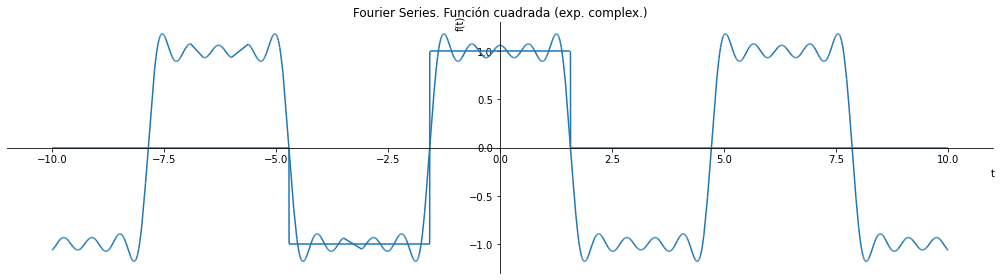

In [9]:
#Implementación ejercicio
t = sp.symbols("t")

def funcion(t):
    return sp.Piecewise((-1, (t>=-sp.pi*3/2)&(t<=-sp.pi/2)), (1, (t>=-sp.pi/2)&(t<=sp.pi/2)), (0, True))

def cn(n, f, limites):
    T = limites[2] - limites[1]
    return (1/T) * sp.integrate(f*sp.exp(-sp.I*2*sp.pi*n*(1/T)*limites[0]), limites)

def xt(n, f, limites):
    T = limites[2] - limites[1]
    return cn(n, f, limites)*sp.exp(sp.I*2*sp.pi*n*(1/T)*limites[0])

def serie(N, f, limites):
    return sum([xt(n, f, limites) for n in range(-N, N+1, 1)])


rango = range(-10, 11)
armonicos = 10
limites = (t, -sp.pi*3/2, sp.pi/2)
s = serie(armonicos, funcion(t), limites)
display(s)
p = sp.plot(funcion(t), s, (t,-10, 10), show=False, legend=False, title="Fourier Series. Función cuadrada (exp. complex.)")
p.show()

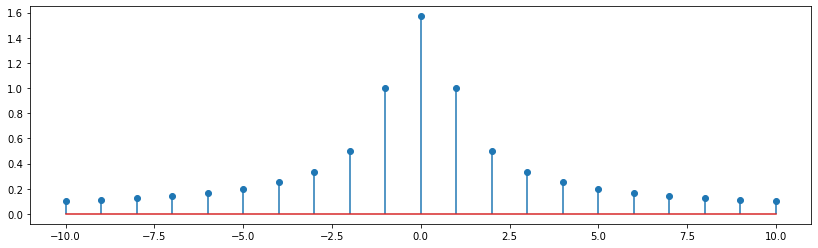

In [10]:
#Implementación ejercicio. Espectro densidad
coeficientes = [cn(n, f(t), limites) for n in range(-armonicos, armonicos+1, 1)]
display(coeficientes)

plt.stem(range(-armonicos, armonicos+1), [abs(c) for c in coeficientes])
plt.show()

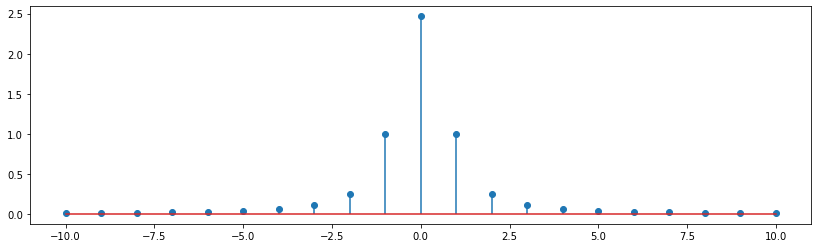

In [11]:
#Implementación ejercicio. Espectro modulo
plt.stem(range(-armonicos, armonicos+1), [abs(c)**2 for c in coeficientes])
plt.show()